#      <center> Ranking news feed updates on social media: <br> A comparative study of supervised models </center>

## News feed updates

The news feed is a list that allows users to follow updates about individuals from their social network. The feed is typically displayed in chronological order. 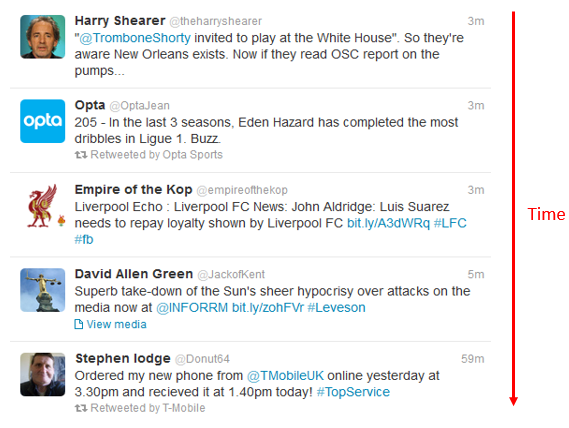

Due to the large amount of data, users are **overwhelmed** by updates displayed chronologically in their news feed. For example, there are about __1500__ new daily updates in the news feed of a standard Facebook user. Moreover, most updates are **irrelevant**.

## Ranking news feed updates

Supervised prediction models have been proposed to rank and predict the relevance of news feed updates. These models analyze labelled training data of updates users read in the past to predict if they will find an update relevant in the future. **No comparison was made** to determine the most suitable models. 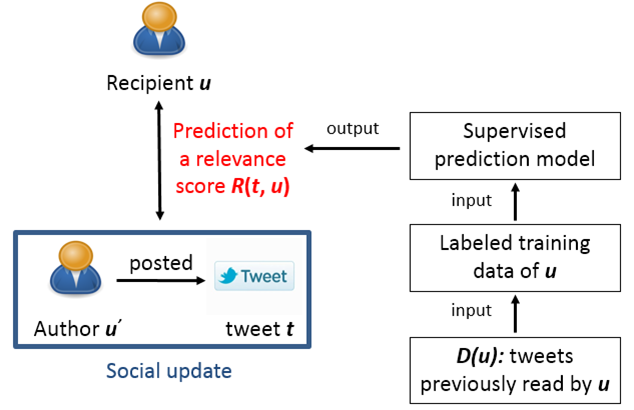

**Labeled training data:** a set of <font color=blue>**input**</font>-<font color=green>**output**</font> pairs (instances) built considering each previously read tweet _**t’ ∈ D(u)**_. 

<h1><center><font color=blue size=3> Features that may influence the relevance of $t'_{1}$ to $u$ </font>, <font color=green size=3> $R(t'_{1},u)$ </font></center></h1>

<h1><center><font size=3> .... </font></center></h1>

<h1><center><font color=blue size=3> Features that may influence the relevance of $t'_{n}$ to $u$ </font>, <font color=green size=3> $R(t'_{n},u)$ </font></center></h1>

**The typical approach involves three steps:**        <br>
**1.** extract features that may influence relevance; <br>
**2.** assign implicit relevance scores to tweets;    <br>
**3.** train the relevance prediction model. 

# Main program with Python and Twitter API

In [1]:
import time
import pickle
import warnings
import collections
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
warnings.filterwarnings("ignore")
% matplotlib inline

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 1- Functions

In [2]:
def barchart(subtitle, x_label, y_label, results, size):
    fig = plt.figure()
    fig.suptitle(subtitle + " on " + str(size) + " tweets")
    ax = fig.add_subplot(111)
    plt.bar(x_label, [np.round(sum(values) / float(len(values)), decimals=2) for values in results], align='center', alpha=0.5)
    ax.set_xticklabels(x_label)
    plt.ylabel(y_label)
    plt.show()

    
def grouped_barcharts(subtitle, x_label, y_label, group_labels, results, y_min, bar_width):
    # Figure size
    plt.figure(figsize=(6, 5))
    for count in range(0, len(group_labels)):
        # Set position of bar on X axis
        if count == 0:
            r = np.arange(len(results[0]))
        else:
            r = [x + bar_width for x in r]
        # Make the plot
        plt.bar(r, results[count], width=bar_width, label=group_labels[count])
    # Add xticks on the middle of the group bars
    plt.xlabel(subtitle, fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(results[0]))], x_label)
    # Adjust Y axis
    min_y, max_y = plt.ylim()
    plt.ylim(ymin=y_min, ymax=max_y-3)
    plt.legend()
    plt.ylabel(y_label)
    plt.show()    
    

def boxplot(subtitle, x_label, y_label, results):
    figure = plt.figure(1)
    figure.suptitle(subtitle)
    x = figure.add_subplot(111)
    plt.boxplot(results)
    x.set_xticklabels(x_label)
    plt.ylabel(y_label)
    plt.show()
    
    
def create_ann_model(params):
    model = Sequential()
    model.add(Dense(params['neurons'], input_dim=13, activation=tf.nn.relu, name="relu"))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation=tf.nn.sigmoid, name="sigmoid"))
    optimizer = SGD(lr=params['learn_rate'], momentum=params['momentum'])
    model.compile(loss=binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    return model

# 2- Load data

We randomly selected __46__ Twitter users. Then, we collected data over ten months using Twitter Rest API and simulated the news feed of each user. This resulted in __26180__ tweets as well as a __35%__ interaction rate with tweets and an average of **569** tweets as training data instances for each user.

In [4]:
df = pd.read_csv("all_data.csv", engine='python')

# 3- Preview the data

In [4]:
df.head()

,Keywords_relevance,Hashtags_relevance,Mentions_relevance,Interaction_rate,Mention_count,Followers_Followings,Seniority,Listed_count,Length,Hashtags,URL,Multimedia,Popularity,Relevance
0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,300.0,85.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,5.0,195.0,70.0,0.0,1.0,0.0,6.0,1.0
2,0.0,1.0,0.0,1.0,1.0,2.0,5.0,195.0,79.0,1.0,0.0,1.0,287.0,0.0
3,0.0,0.0,0.0,0.0,0.0,484.0,8.0,4632.0,120.0,0.0,1.0,0.0,33.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,4.0,28.0,106.0,0.0,0.0,1.0,4.0,1.0


## Input Features

Features that may influence the relevance of a tweet __t__ posted by an author **u'** to the recipient **u**. We use 13 most relevant features according to related work

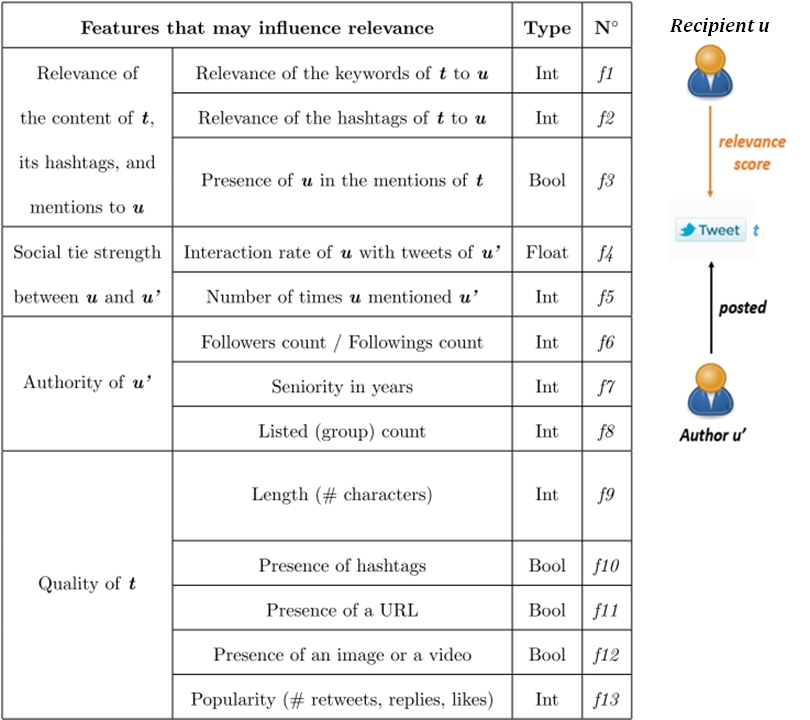

## Output relevance score

We split relevance scores into two bins because train a finer-grained classifier (e.g., __t__ is very relevant if **u** retweeted, liked, and replied to it) would be difficult as user multiple interactions with the same tweet are not frequent. Only 5% of tweets get at least two types of interaction from the same user.

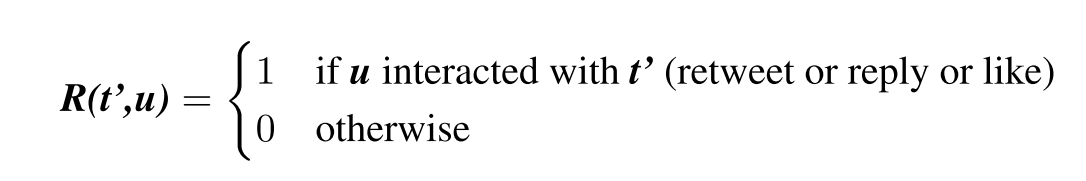

# 4- Statistical description of the data

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Keywords_relevance,Hashtags_relevance,Mentions_relevance,Interaction_rate,Mention_count,Followers_Followings,Seniority,Listed_count,Length,Hashtags,URL,Multimedia,Popularity,Relevance
count,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00,26180.00
mean,7.15,2.82,0.04,0.33,0.83,59438.66,6.27,4953.31,108.72,0.28,0.67,0.13,2129.95,0.36
std,24.07,18.10,0.19,0.32,3.83,776009.18,2.49,17154.20,32.07,0.45,0.47,0.34,32744.10,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,3.00,4.00,138.00,88.00,0.00,0.00,0.00,4.00,0.00
50%,0.00,0.00,0.00,0.25,0.00,21.00,7.00,416.00,121.00,0.00,1.00,0.00,17.00,0.00
75%,3.00,0.00,0.00,0.60,0.00,305.00,8.00,2006.00,136.00,1.00,1.00,0.00,107.00,1.00
max,412.00,397.00,1.00,1.00,108.00,16089110.00,11.00,228104.00,140.00,1.00,1.00,1.00,2721653.00,1.00


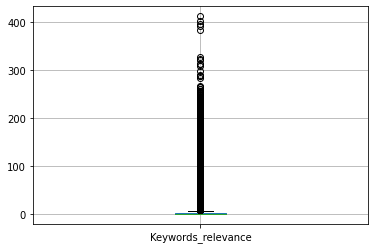

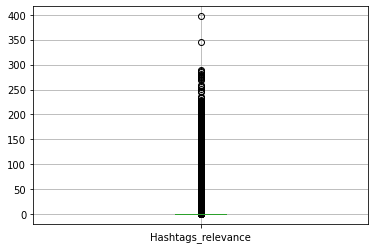

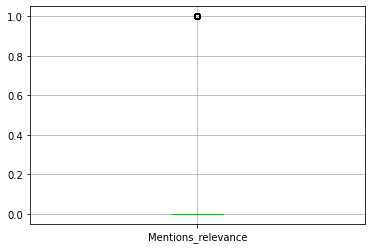

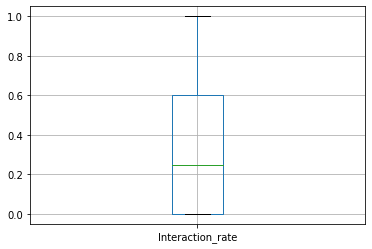

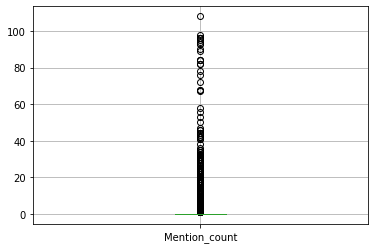

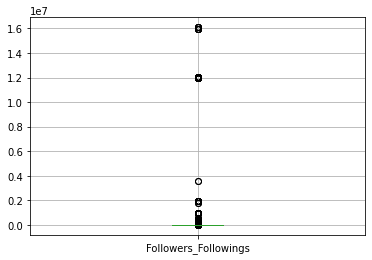

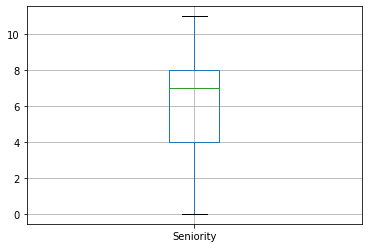

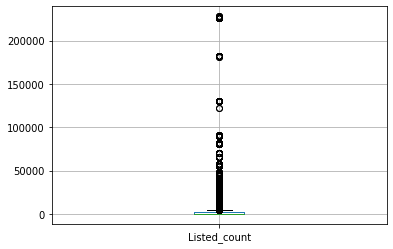

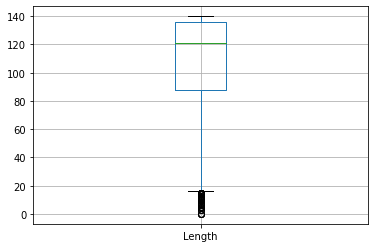

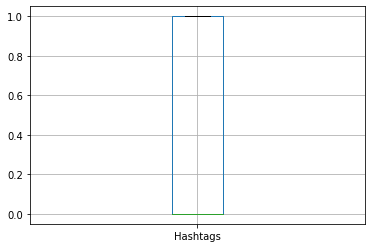

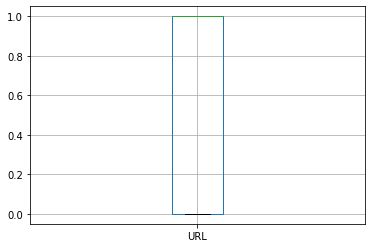

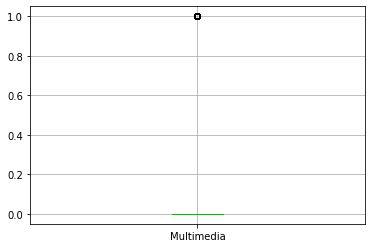

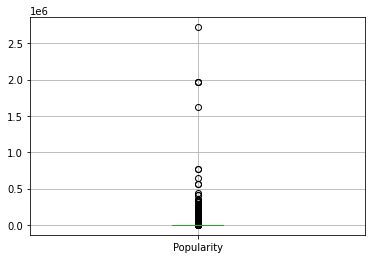

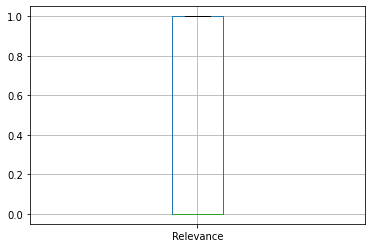

In [6]:
for column in df:
    plt.figure()
    df.boxplot([column])

# 5- Visualize the data

In applied statistics and applied machine learning, visualization is an important step to understand data and gain insights.

## Distribution of the class label with a bar-chart

Text(0, 0.5, 'Number of tweets')

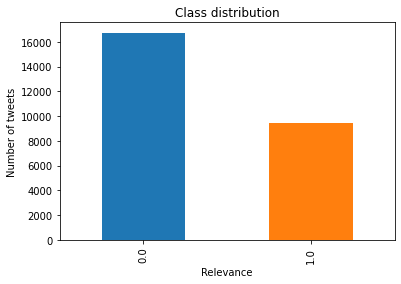

In [5]:
ax = df['Relevance'].value_counts().plot.bar(title="Class distribution", color=['C0', 'C1'])
ax.set_xlabel("Relevance")
ax.set_ylabel("Number of tweets")

## Feature distributions with histograms

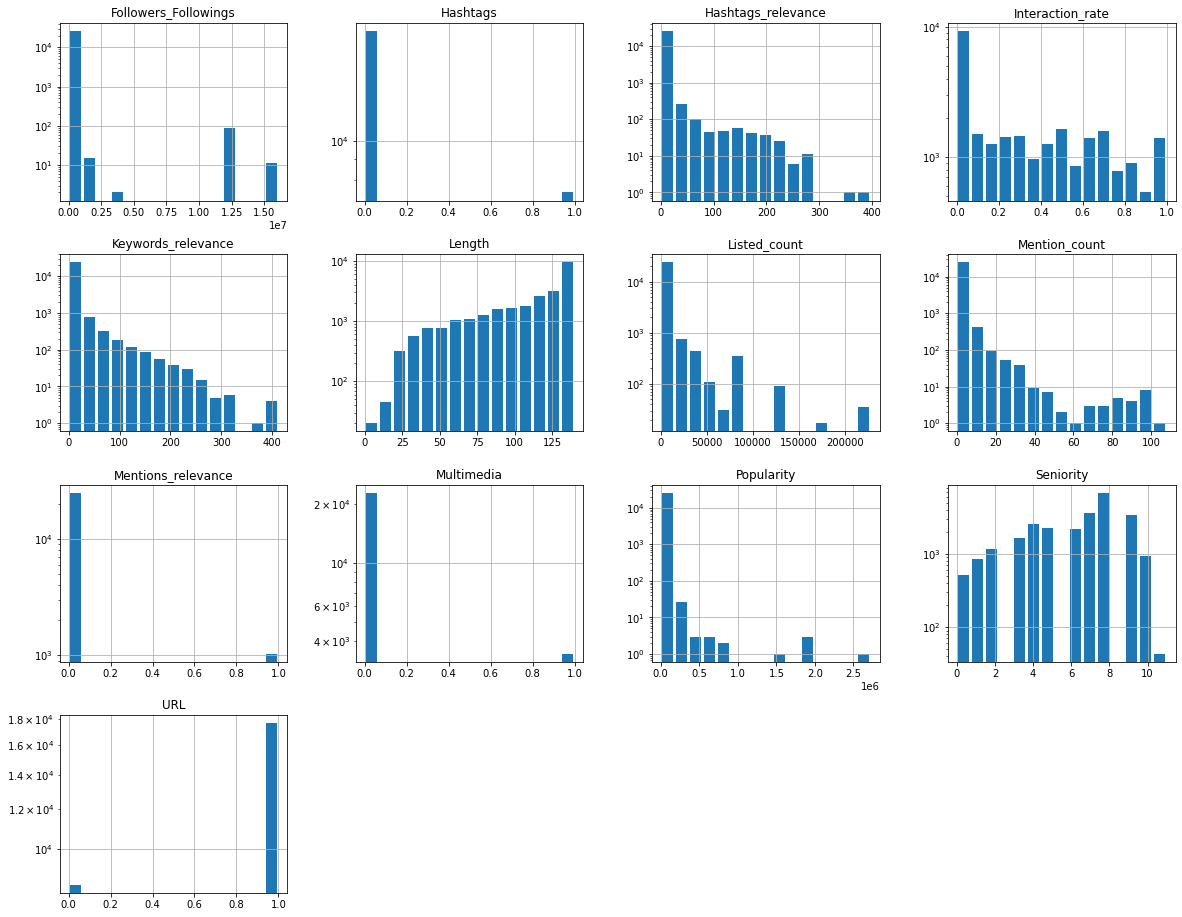

In [8]:
df.drop('Relevance', axis=1).hist(bins=15, figsize=(20, 16), sharex=False, log=True, rwidth=0.8)
plt.show()

## Feature-Class distributions with histograms

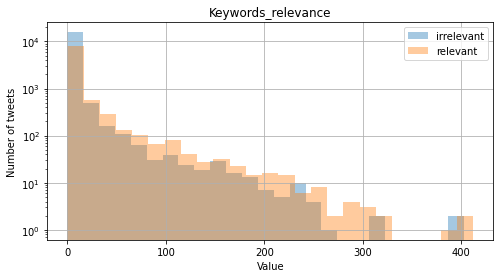

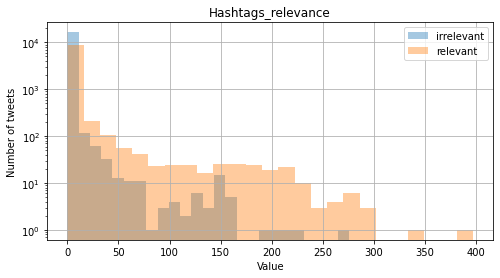

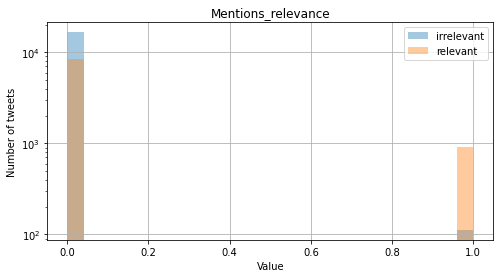

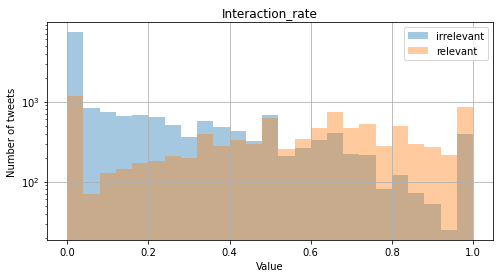

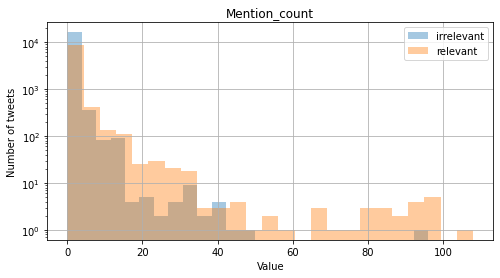

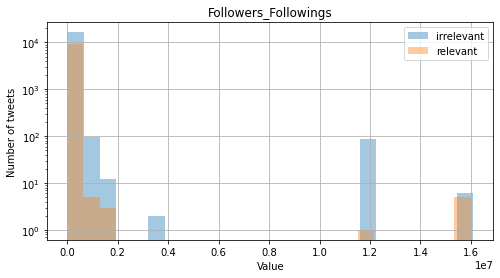

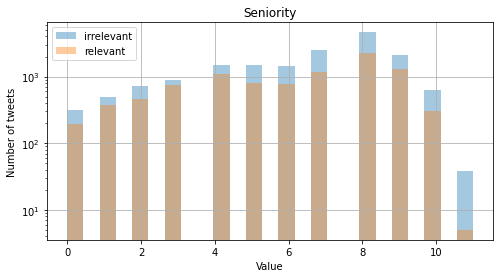

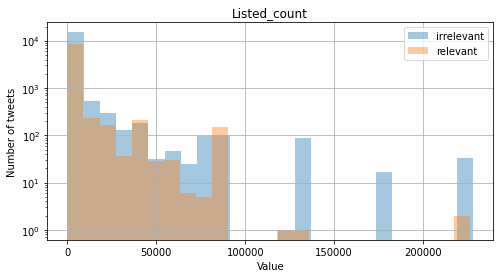

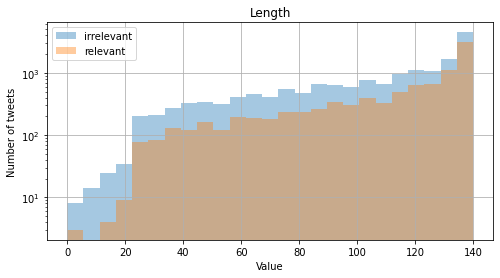

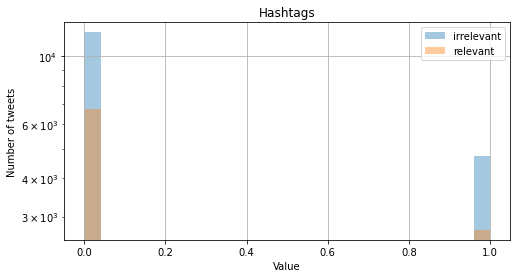

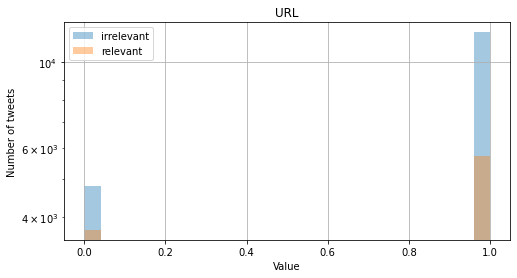

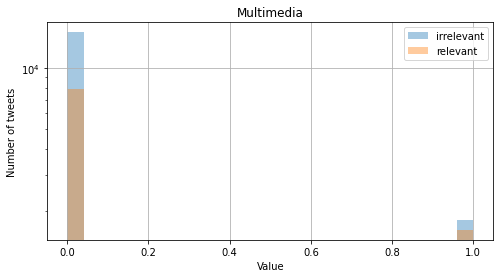

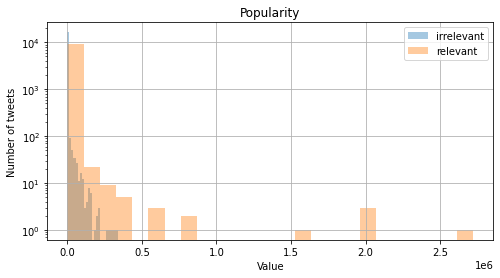

In [6]:
for column in df.drop('Relevance', axis=1):
    df.groupby('Relevance')[column].hist(bins=25, figsize=(8, 4), alpha=0.4, log=True)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Number of tweets")
    plt.legend(['irrelevant', 'relevant'])
    plt.show()

# 6- Comparison of supervised models

We selected **seven** supervised algorithms that were used in related work. Then, since ANN and SVM require data scaling, we normalized all feature values in the range [0,1] using the min-max scaling. For a fair comparison, we selected the **best parameters** of each algorithm with a **5-fold** time-series cross-validation performed on the train set. We thus ran **Randomized Search** over different parameter values. Finally, to study the algorithmic stability, we retrained and iterated each model over **20** random state values.

## Selected algorithms

In [4]:
dict_users = collections.defaultdict()
# Gradient Boosting, Random Forest, Support Vector Machine, Decision Trees, Neural networks, Logistic Regression, Naive Bayes
ML_algorithms = ["GB", "RF", "SVM", "DT", "ANN", "LR", "NB"]
# Load users dictionary
for algorithm in ML_algorithms:
    with open(algorithm + ".pkl", "rb") as input1:
        dict_users[algorithm] = pickle.load(input1)

##  A - Prediction accuracy

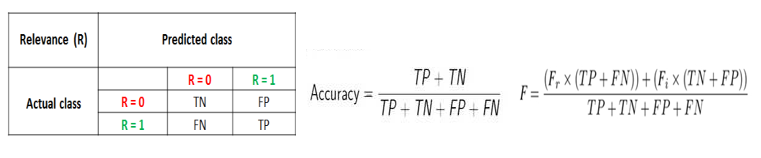

- _**F**_ is the weighted F1 score <br>
- _**F<sub>r</sub>**_ is the F1 score for the relevant tweets class <br>
- _**F<sub>i</sub>**_ is the F1 score for the irrelevant tweets class

In [ ]:
ML_accuracy, ML_FScores = [], []

for algorithm in ML_algorithms:

    Accuracy_random_state, FScores_random_state = [], []
    for n in range(20):

        sum_accuracy = sum_F1Score = 0
        for user_screen_name in dict_users[algorithm].keys():
            # User's data and best estimator
            X = dict_users[algorithm][user_screen_name][0]
            y = dict_users[algorithm][user_screen_name][1]
            best_estimator = dict_users[algorithm][user_screen_name][2]
            
            # Train and test set
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

            # Train the best classifier on the train set
            if algorithm == "ANN":
                params = dict_users[algorithm][user_screen_name][3]
                clf = create_ann_model(params)
                clf.fit(X_train, y_train, epochs=params['epochs'], batch_size=32)
            else:
                clf = best_estimator
                clf.fit(X_train, y_train)

            # Predictions on the test set
            predictions = clf.predict(X_test)
            if algorithm == "ANN":
                predictions = [round(x[0]) for x in predictions]

            # Sum of accuracy and F1 Scores for all recipient users
            sum_accuracy += np.round(accuracy_score(y_test, predictions) * 100, decimals=2)
            sum_F1Score += np.round(f1_score(y_test, predictions, average="weighted") * 100, decimals=2)

        # Average results for all users on 20 random state values:
        Accuracy_random_state.append(np.round(sum_accuracy / len(dict_users[algorithm].keys()), decimals=2))
        FScores_random_state.append(np.round(sum_F1Score / len(dict_users[algorithm].keys()), decimals=2))

    ML_accuracy.append(Accuracy_random_state)
    ML_FScores.append(FScores_random_state)

Accuracy [81.18, 81.2, 78.6, 78.17, 78.66, 77.58, 74.11]
F-score [80.7, 80.68, 77.49, 77.63, 76.86, 76.48, 73.29]


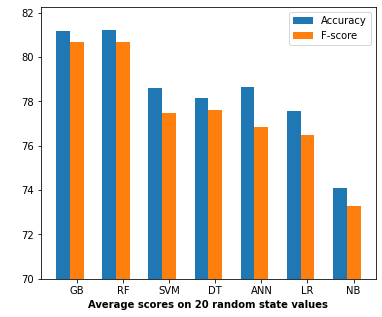

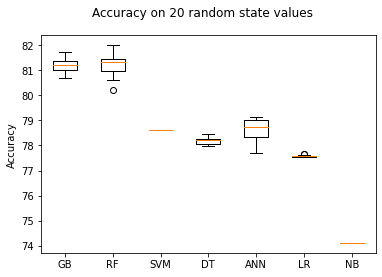

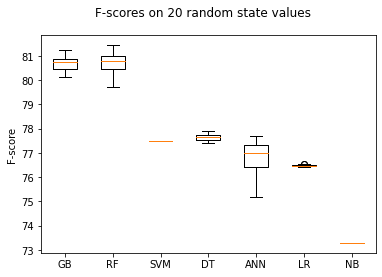

In [12]:
ML_results = [[np.round(sum(values) / float(len(values)), decimals=2) for values in ML_accuracy],
              [np.round(sum(values) / float(len(values)), decimals=2) for values in ML_FScores]]
print('Accuracy', ML_results[0])
print('F-score', ML_results[1])
grouped_barcharts('Average scores on 20 random state values', ML_algorithms, ' ', ['Accuracy', 'F-score'], ML_results, 70, 0.3)
boxplot('Accuracy on 20 random state values', ML_algorithms, "Accuracy", ML_accuracy)
boxplot('F-scores on 20 random state values', ML_algorithms, "F-score", ML_FScores)

## B- Prediction accuracy on various training set sizes

In [ ]:
ML_FScores = []

for algorithm in ML_algorithms:

    FScores_training_size = []
    training_set_sizes = [0.25, 0.5, 0.75, 1]
    for training_size in training_set_sizes:

        sum_F1Score = 0
        for user_screen_name in dict_users[algorithm].keys():
            # User's data and best estimator
            X = dict_users[algorithm][user_screen_name][0]
            y = dict_users[algorithm][user_screen_name][1]
            best_estimator = dict_users[algorithm][user_screen_name][2]
            
            instances = round(len(y) * training_size)
            sum_F1Score_random_state = 0
            for n in range(20):
                # Train and test set
                X_train, X_test, y_train, y_test = train_test_split(X[: instances], y[: instances], test_size=0.3, shuffle=False)

                # Train the best classifier on the train set
                if algorithm == "ANN":
                    params = dict_users[algorithm][user_screen_name][3]
                    clf = create_ann_model(params)
                    clf.fit(X_train, y_train, epochs=params['epochs'], batch_size=32)
                else:
                    clf = best_estimator
                    clf.fit(X_train, y_train)

                # Predictions on the test set
                predictions = clf.predict(X_test)
                if algorithm == "ANN":
                    predictions = [round(x[0]) for x in predictions]

                # Sum of F1 Scores on 20 random state values
                sum_F1Score_random_state += np.round(f1_score(y_test, predictions, average="weighted") * 100, decimals=2)
            
            # Sum of F1 Scores for all recipient users
            sum_F1Score += np.round(sum_F1Score_random_state / (n+1), decimals=2)

        # Average results for all users on various training set sizes
        FScores_training_size.append(np.round(sum_F1Score / len(dict_users[algorithm].keys()), decimals=2))
    
    ML_FScores.append(FScores_training_size)

GB [70.6, 74.7, 78.09, 80.57]
RF [70.89, 74.03, 76.68, 80.69]
SVM [68.93, 75.34, 74.99, 77.49]
DT [66.32, 72.76, 77.14, 77.61]
ANN [64.57, 70.89, 73.72, 76.7]
LR [71.88, 74.96, 76.74, 76.48]
NB [67.8, 70.37, 71.32, 73.29]


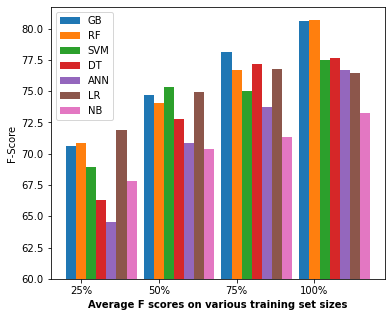

In [14]:
for count in range(0, len(ML_algorithms)):
    print(ML_algorithms[count], ML_FScores[count])
training_sizes = [str(int(i*100)) + '%' for i in training_set_sizes]
grouped_barcharts("Average F scores on various training set sizes", training_sizes, "F-Score", ML_algorithms, ML_FScores, 60, 0.13)

## C- Training and predicting time

In [ ]:
ML_training_time, ML_predicting_time = [], []

for algorithm in ML_algorithms:

    training_random_state, predicting_random_state = [], []
    for n in range(20):
            
        sum_training_time = sum_predicting_time = 0
        sum_training_size = sum_predicting_size = 0
        for user_screen_name in dict_users[algorithm].keys():
            # User's data and best estimator
            X = dict_users[algorithm][user_screen_name][0]
            y = dict_users[algorithm][user_screen_name][1]
            best_estimator = dict_users[algorithm][user_screen_name][2]
            
            # Train and test set
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
            sum_training_size += len(X_train)
            sum_predicting_size += len(X_test)
            
            # Train the best classifier on the train set
            start_training = time.time()
            if algorithm == "ANN":
                params = dict_users[algorithm][user_screen_name][3]
                clf = create_ann_model(params)
                clf.fit(X_train, y_train, epochs=params['epochs'], batch_size=32)
            else:
                clf = best_estimator
                clf.fit(X_train, y_train)
            sum_training_time += (time.time() - start_training)

            # Predictions on the test set
            start_predicting = time.time()
            predictions = clf.predict(X_test)
            sum_predicting_time += (time.time() - start_predicting)

        # Average results for all users on 20 random state values:
        training_random_state.append(sum_training_time)
        predicting_random_state.append(sum_predicting_time)

    ML_training_time.append(training_random_state)
    ML_predicting_time.append(predicting_random_state)

[1.93, 3.43, 1.48, 0.05, 46.92, 0.71, 0.03]
[0.02, 0.14, 0.09, 0.0, 2.39, 0.0, 0.01]


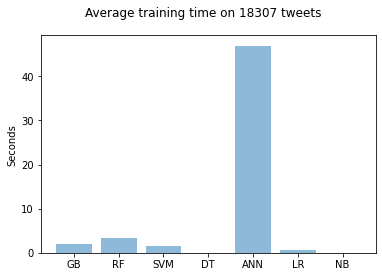

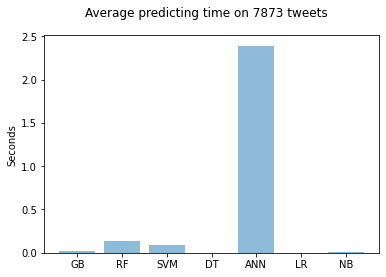

In [6]:
print([np.round(sum(values) / float(len(values)), decimals=2) for values in ML_training_time])
print([np.round(sum(values) / float(len(values)), decimals=2) for values in ML_predicting_time])
barchart('Average training time', ML_algorithms, 'Seconds', ML_training_time, sum_training_size)
barchart('Average predicting time', ML_algorithms, 'Seconds',  ML_predicting_time, sum_predicting_size)

## Bonus: Feature importance

{'n_estimators': 100, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': False}


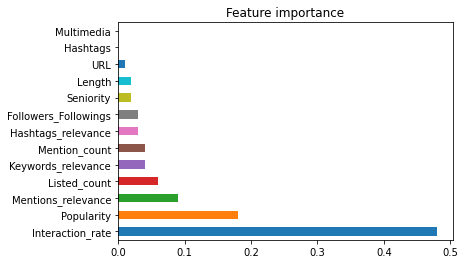

In [9]:
# Train and test set
y = df.Relevance
X = df.drop('Relevance', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

# Create a parameter distributions: map the parameter names to the values that should be searched
param_dist = {
    'n_estimators': [15, 30, 50, 70, 100],
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 6, 9],
    'min_samples_split': [4, 7, 10, 13, 16, 19],
    'min_samples_leaf': [3, 7, 10, 13, 16, 19],
    'max_features': ["sqrt", "log2"],
    'bootstrap': [True, False]}

# Instantiate the randomized search, CV: the number of splits for the cross-validator, n_iter controls the number of searches
rand = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5, scoring='f1_weighted', n_iter=150, random_state=69420)

# Fit the rand with data
rand.fit(X_train, y_train)

# Examine the best model
print(rand.best_params_)

# Train the model on the train set
model = rand.best_estimator_.fit(X_train, y_train)

# Feature importance
feat_importances = pd.Series(np.round(model.feature_importances_, 2), index=X.columns)
colors = ["C" + str(count) for count in range(0, len(feat_importances))]
feat_importances.nlargest(20).plot(kind='barh', title='Feature importance', color=colors)